## Ceneo Analyzer

## Biblioteki

In [82]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

## Lista kodów produktów o kórych zostały pobrane opinie

In [83]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

114700014


## Kod produku, którego opinie mają zostać przeanalizowane

In [84]:
product_id = "114700014"

## Wczytanie do obiektu pandas.DataFrame opinii o wskazanym produkcie

In [95]:
opinions = pd.read_json(f"opinions\{product_id}.json")
opinions



,Opinion_ID,Author,Recommendation,Ratings,Content,Pros,Cons,useful,useless,post_date,purchase_date
0,18226826,a...i,NaN,5/5,To rzeczywiście wysoka półka.\nJedyną wadą jes...,"[dużo końcówek, lekki, poręczny, przycisk zasi...",[słaba bateria],2,0,2023-12-20 00:33:01,2023-12-08 22:22:49
1,15437754,nemesis wawa,NaN,5/5,Zmiana z v8 zdecydowanie na plus. Dużo lżejszy...,"[dużo końcówek, lekki, poręczny, przycisk zasi...",[brak],2,0,2021-12-28 08:49:18,2021-12-17 21:01:22
2,17531964,w...n,NaN,"4,5/5",Świetny. Końcówka do tapicerki nie jest tak sk...,"[lekki, poręczny, przycisk zasilania, wyświetl...",[],0,0,2023-05-22 06:57:51,2023-05-09 06:29:27
3,18533359,o...a,NaN,5/5,"Po 12 latach użytkowania ciężkiego ""Rainbow"" t...",[],[],0,0,2024-03-28 14:59:39,2024-03-20 19:55:02
4,18178470,s...a,NaN,5/5,od teraz sprzątanie do przyjemność. urządzenie...,[],[],0,0,2023-12-06 10:51:04,2023-11-25 13:30:36
...,...,...,...,...,...,...,...,...,...,...,...
170,17545591,J...2,NaN,5/5,Ok,[],[],0,0,2023-05-25 07:24:58,2023-05-07 16:04:38
171,17448760,b...r,NaN,5/5,ok,"[dużo końcówek, lekki, poręczny, przycisk zasi...",[],0,0,2023-04-26 21:03:39,2023-04-23 10:00:47
172,15826211,Użytkownik Ceneo,NaN,5/5,"Odkurzacz mały, poręczny przy tym posiada bard...","[lekki, poręczny, przycisk zasilania, wyświetl...",[],0,0,2022-03-15 20:58:40,None
173,18125745,t...l,NaN,"2,5/5","Odkurza dobrze, niestety bardzo szybko rozłado...","[lekki, poręczny, przycisk zasilania, wyświetl...",[wytrzymała bateria],0,0,2023-11-22 12:40:45,2023-11-10 10:24:44


## Podstawowe statystyki zbioru opinii

In [86]:
opinions_count = opinions.shape[0]
Pros_count = opinions.Pros.apply(lambda p: 1 if p else 0).sum()
Cons_count = opinions.Cons.apply(lambda c: 1 if c else 0).sum()
average_Ratings = opinions.Ratings.mean()

## Histogram częstości poszczególnych ocen produktu


In [87]:
Ratings_distribution = opinions.Ratings.value_counts().reindex(np.arange(0,5.5,0.5))
Ratings_distribution

Ratings
0.0      NaN
0.5      NaN
1.0      1.0
1.5      NaN
2.0      NaN
2.5      1.0
3.0      1.0
3.5      2.0
4.0      8.0
4.5     18.0
5.0    144.0
Name: count, dtype: float64

AttributeError: 'Axes' object has no attribute 'container'

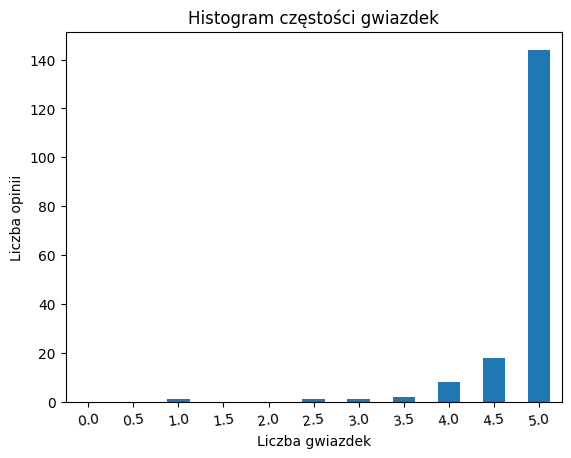

In [88]:
fig,ax = plt.subplots()
Ratings_distribution.plot.bar()
plt.title("Histogram częstości gwiazdek")
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.xticks(rotation=8)
plt.bar_label(ax.container[0], label_type = "edge")

## Udział poszczególnych rekomendacji w opiniach o produkcie

In [91]:
Recommendations_distribution = opinions.Recommendation.value_counts().reindex(["Polecam","Nie polecam","Brak"])
Recommendations_distribution


Recommendation
Polecam       NaN
Nie polecam   NaN
Brak          NaN
Name: count, dtype: float64

In [92]:
Recommendations_distribution.plot.pie(
    colors = ["hotpink","deeppink","lavenderblush"]
)

c:\Users\s-121-21\Desktop\CeneoScraperKK\.venv\Lib\site-packages\matplotlib\axes\_axes.py:3232: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: cannot convert float NaN to integer

ValueError: need at least one array to concatenate

<Figure size 640x480 with 1 Axes>